# **Data science workshop project**
Elad, Tsach, Oz, Eva

The predictors of in-hospital mortality for admitted patients remain poorly characterized.

**Goal of the project**: We aimed to develop and validate a prediction model for all-cause in-hospital mortality among admitted patients.


## **Part 1- Data analysis**

**Goal: Understand the data to build better model of prediction**


- 85 features in original dataset
- not separated in train/test/validation
- prediction problem: classification : hospital death or not

In [635]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

In [636]:
complete_data = pd.read_csv('dataset.csv')

In [637]:
complete_data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [638]:
complete_data.shape   #dataset sizes: 85 columns and 91713 rows/patients

(91713, 85)

In [639]:
#column / features and data types
complete_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

We have the column number 83 that is empty so we will delete it. 

In addition, we will also remove the feature encounter_id and patient_id becuse their are unique for each patient and do not impact on the prediction.

In [640]:
complete_data.drop(complete_data.columns[[0,1,83]], axis=1, inplace=True)
features = complete_data.columns

#partition based on original data

# WITH BMI
numerical_features = ["age", "bmi","height", "weight", "elective_surgery", 
                      "pre_icu_los_days", "gcs_eyes_apache","apache_2_diagnosis",
                      "gcs_motor_apache", "gcs_verbal_apache", "heart_rate_apache",
                     "map_apache", "resprate_apache", "temp_apache", "d1_diasbp_max",
                      "d1_diasbp_min","d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min",
                      "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_min", 
                      "d1_mbp_noninvasive_max", "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_resprate_min",
                      "d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min",
                      "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", "d1_temp_min",
                      "h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min",
                      "h1_heartrate_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_min",
                      "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_resprate_min",
                      "h1_spo2_max", "h1_spo2_min", "h1_sysbp_max", "h1_sysbp_min",
                      "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "d1_glucose_max", "d1_glucose_min",
                      "d1_potassium_max", "d1_potassium_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]

categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", "apache_3j_bodysystem", "apache_2_bodysystem"]

binary_features = ["arf_apache", "gcs_unable_apache", "intubated_apache", 
                   "ventilated_apache", "elective_surgery", "gender", "apache_post_operative",
                   "aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression",
                   "leukemia", "lymphoma", "solid_tumor_with_metastasis"]


Information about features meaning: in separate fil called "Medical information important for the project"
     

In [641]:
class_prediction = "hospital_death" #binary : 0 or 1

In [642]:
complete_data["hospital_death"].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

<AxesSubplot:>

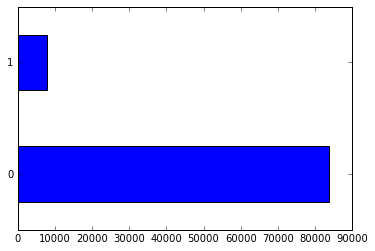

In [643]:
hd = complete_data["hospital_death"].value_counts()
hd.plot(kind="barh")

The distribution of the two classes is not balanced at all : it will be challenging because most of the patients in the dataset haven t hospital mortality.

In [644]:
complete_data.describe() #only for numerical data

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,...,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,...,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,...,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,113.000000,203.010000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,122.000000,409.020000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,301.000000,703.030000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,308.000000,2201.050000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


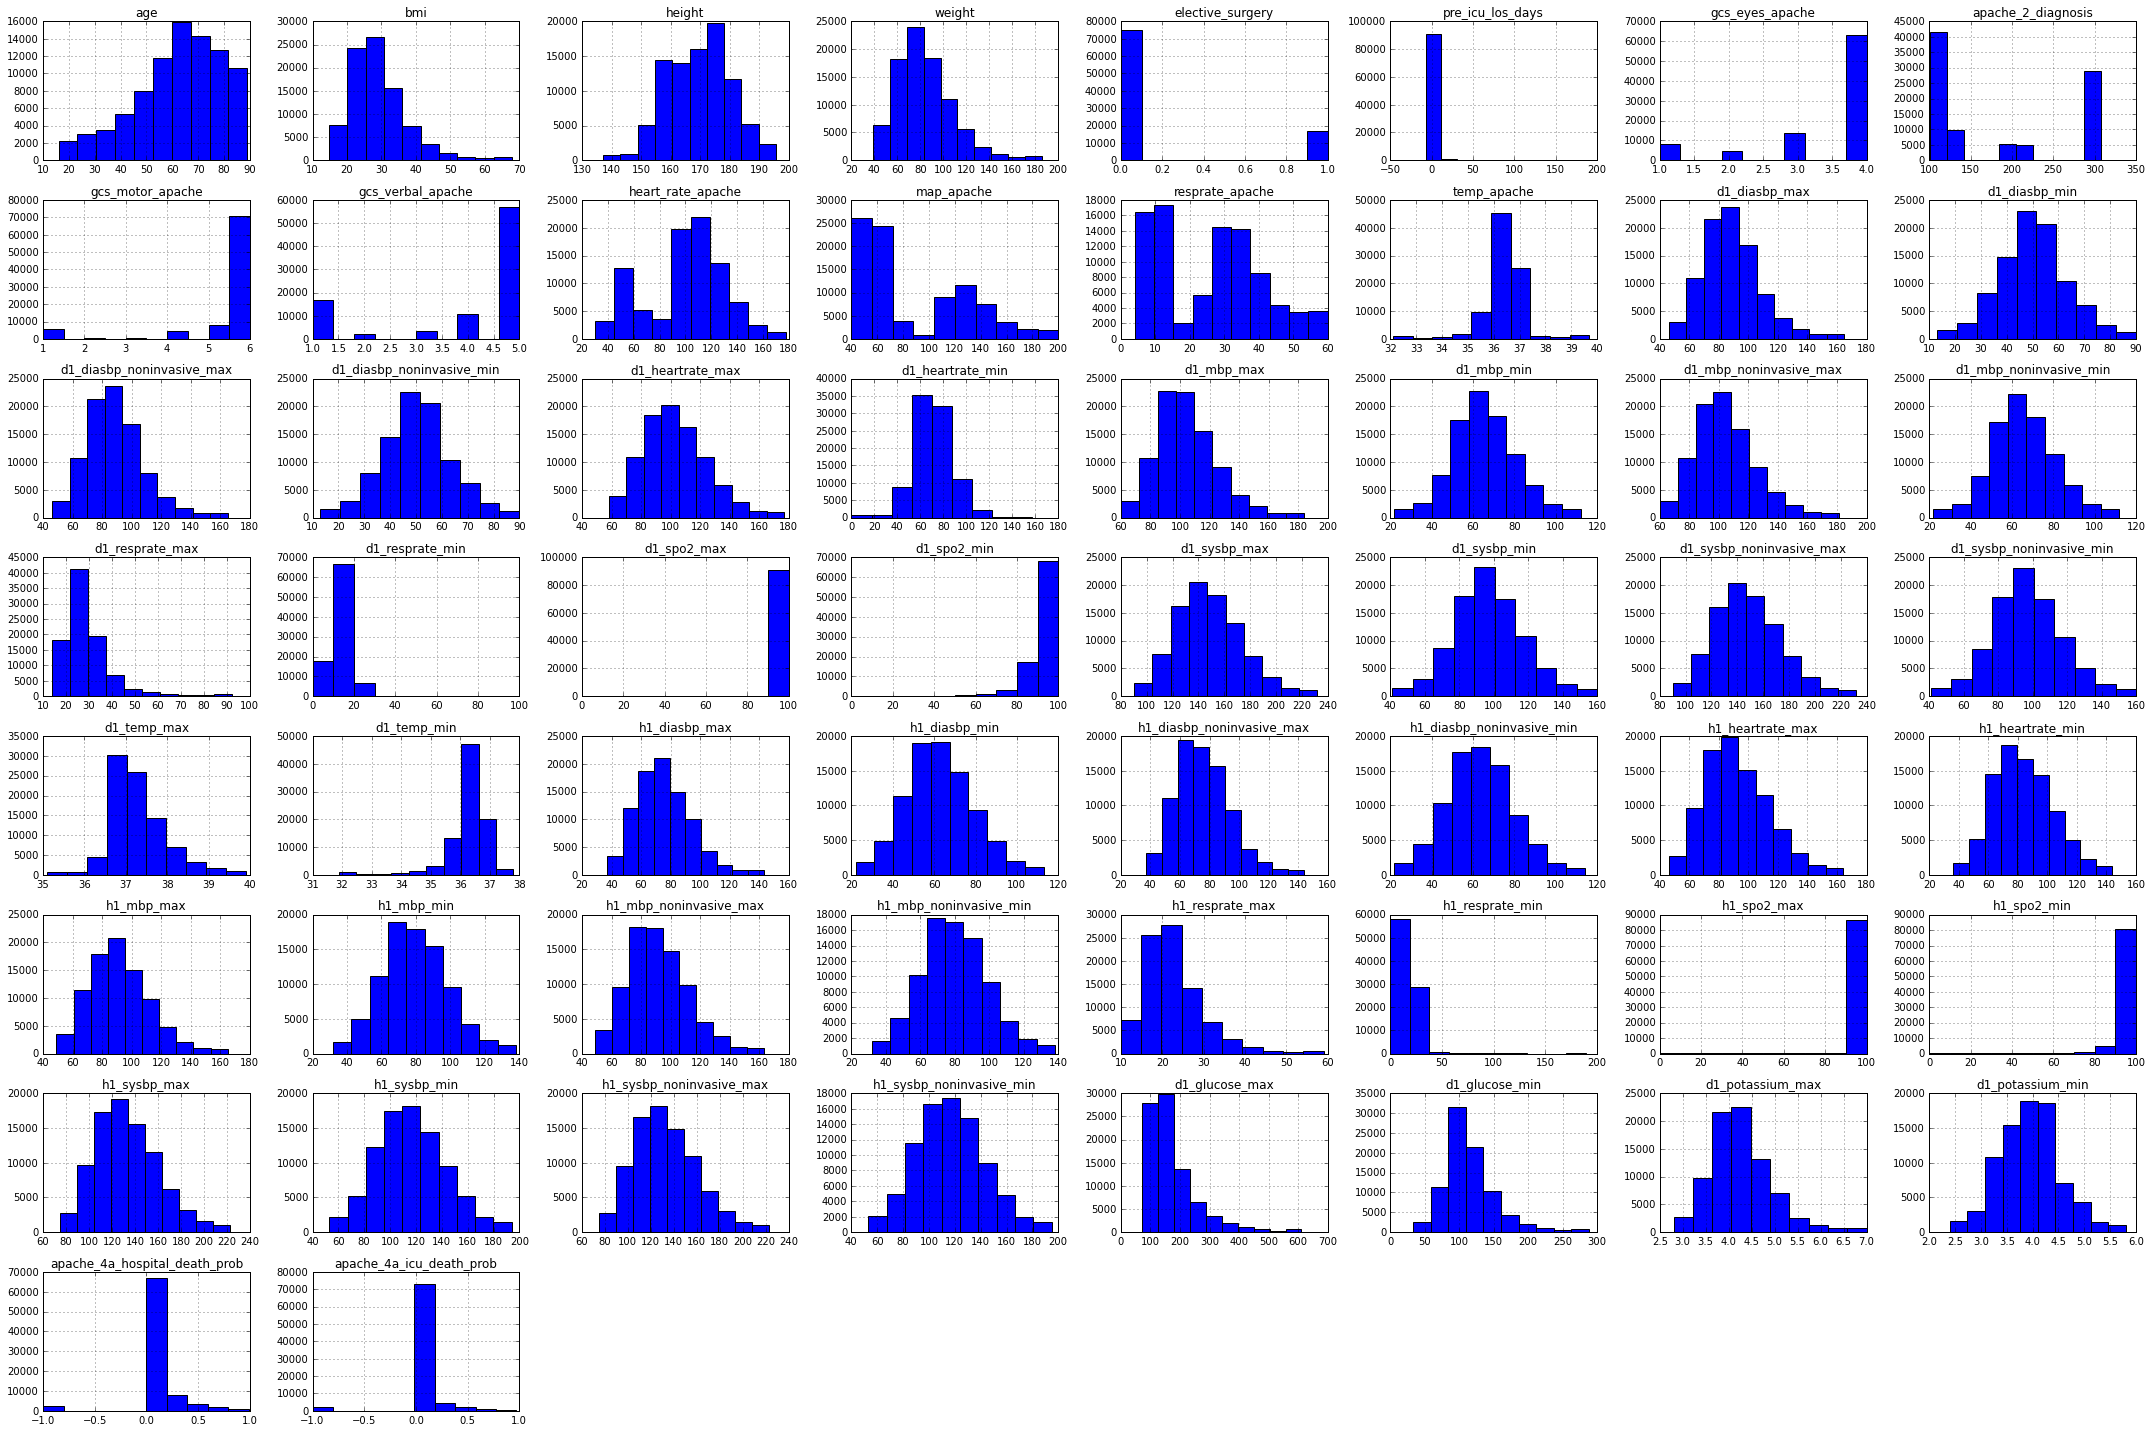

In [645]:
#show data distribution

# df = pd.read_csv('dataset.csv')

complete_data[numerical_features].hist(alpha=1, figsize=(30, 20))
plt.tight_layout()
plt.show()


Missing values: let s check number of missing values in each features

In [646]:
pd.set_option('display.max_rows', 100)
complete_data.isnull().sum(axis=0).sort_values(ascending=False)

d1_potassium_max                 9585
d1_potassium_min                 9585
h1_mbp_noninvasive_min           9084
h1_mbp_noninvasive_max           9084
apache_4a_hospital_death_prob    7947
apache_4a_icu_death_prob         7947
h1_diasbp_noninvasive_min        7350
h1_diasbp_noninvasive_max        7350
h1_sysbp_noninvasive_max         7341
h1_sysbp_noninvasive_min         7341
d1_glucose_max                   5807
d1_glucose_min                   5807
h1_mbp_min                       4639
h1_mbp_max                       4639
h1_resprate_min                  4357
h1_resprate_max                  4357
age                              4228
h1_spo2_max                      4185
h1_spo2_min                      4185
temp_apache                      4108
h1_diasbp_min                    3619
h1_diasbp_max                    3619
h1_sysbp_min                     3611
h1_sysbp_max                     3611
bmi                              3429
h1_heartrate_max                 2790
h1_heartrate

In [647]:
complete_data.shape[0] - complete_data.dropna().shape[0]

34778

third of rows have missing values!

In [648]:
missing_data = complete_data[complete_data.isnull().any(axis=1)]
missing_data['hospital_death'].value_counts()

0    31754
1     3024
Name: hospital_death, dtype: int64

Most of missing values are 0 which we have a lot so maybe we can remove rows which are in 0 
in case they are 1 we will try to fill it or change the representation of the data

In [649]:
# complete_data.drop(complete_data[complete_data['hospital_death'] == 0].index, inplace = True)
# index_list = complete_data[complete_data['hospital_death'] == 0].index
# index_list = complete_data.isnull().index

# complete_data.isnull().drop(index_list)
# complete_data

In [650]:
#complete_data.isnull().sum(axis=0).sort_values(ascending=False)

Let s try to find a way to fill missing values, we will check possible values in the dataset and we will tr to find the better way toto fill them

WE can see that bmi has missing value but we can calculate hit because it depends on 2 other feture: height and weigh
the formula is weigh /height^2

In [651]:
bmi_set = complete_data[['bmi','weight','height']]
bmi_set[bmi_set.isnull().any(axis=1)].head(20)

,bmi,weight,height
4,NaN,NaN,188.0
7,NaN,NaN,165.0
8,NaN,NaN,170.2
12,NaN,NaN,175.3
13,NaN,NaN,172.7
15,NaN,NaN,160.0
22,NaN,NaN,162.6
28,NaN,NaN,160.0
37,NaN,NaN,151.8
41,NaN,NaN,165.1


We can see that we can t fill bmi by calculating with height and weight because they are also missing 

In [652]:
#create a column to know where bmi is missing
complete_data['missing bmi'] = (complete_data['bmi'].isnull()).astype(int)
complete_data['missing bmi']
complete_data['bmi'].fillna(100,inplace=True) #will be remove then
complete_data.head(10) #last feature at extreme right side

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,missing bmi
0,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,0
1,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,0
2,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,0
3,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,0
4,33,19.0,100.00,0,Caucasian,M,188.0,Accident & Emergency,91,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0,1
5,83,67.0,27.56,0,Caucasian,M,190.5,Accident & Emergency,95,admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0,0
6,83,59.0,57.45,0,Caucasian,F,165.1,Accident & Emergency,95,admit,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,0
7,33,70.0,100.00,0,Caucasian,M,165.0,Accident & Emergency,91,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,1
8,118,45.0,100.00,0,Caucasian,M,170.2,Other Hospital,114,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,1,1
9,118,50.0,25.71,0,NaN,M,175.3,Accident & Emergency,114,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,0


In [653]:
bmi_cat = ['Severe Thinness bmi', 'Moderate Thinness bmi','Mild Thinness bmi','Normal bmi', 'Overweight bmi','Obese bmi l1',"Obese bmi l2"," Obese bmi l3","missing bmi 2"]

category_bmi = pd.cut(complete_data['bmi'], bins=[0,16,17,18.5,25,30,35,40,80,100], 
                      labels=bmi_cat)
complete_data.insert(9,'bmi group',category_bmi)

complete_data.drop('bmi', inplace=True, axis=1)
numerical_features.remove("bmi")




In [654]:
complete_data = pd.get_dummies(complete_data,columns=['bmi group'])
complete_data.drop('bmi group_missing bmi 2', inplace=True, axis=1) 

complete_data.head(15) #look at new column bmi group 



,hospital_id,age,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,hospital_death,missing bmi,bmi group_Severe Thinness bmi,bmi group_Moderate Thinness bmi,bmi group_Mild Thinness bmi,bmi group_Normal bmi,bmi group_Overweight bmi,bmi group_Obese bmi l1,bmi group_Obese bmi l2,bmi group_ Obese bmi l3
0,118,68.0,0,Caucasian,M,180.3,Floor,92,admit,CTICU,...,0,0,0,0,0,1,0,0,0,0
1,81,77.0,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,...,0,0,0,0,0,0,1,0,0,0
2,118,25.0,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,...,0,0,0,0,0,0,0,1,0,0
3,118,81.0,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,...,0,0,0,0,0,1,0,0,0,0
4,33,19.0,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,...,0,1,0,0,0,0,0,0,0,0
5,83,67.0,0,Caucasian,M,190.5,Accident & Emergency,95,admit,Med-Surg ICU,...,0,0,0,0,0,0,1,0,0,0
6,83,59.0,0,Caucasian,F,165.1,Accident & Emergency,95,admit,Med-Surg ICU,...,0,0,0,0,0,0,0,0,0,1
7,33,70.0,0,Caucasian,M,165.0,Accident & Emergency,91,admit,Med-Surg ICU,...,0,1,0,0,0,0,0,0,0,0
8,118,45.0,0,Caucasian,M,170.2,Other Hospital,114,admit,CCU-CTICU,...,1,1,0,0,0,0,0,0,0,0
9,118,50.0,0,NaN,M,175.3,Accident & Emergency,114,admit,CCU-CTICU,...,0,0,0,0,0,0,1,0,0,0


About gcs test : the result help to know how much a person is in danger to die: we will try to add the result to the data

In [655]:
def generate_gcs_score(row):
   return row['gcs_motor_apache']+row['gcs_verbal_apache']+row['gcs_eyes_apache']

In [656]:
gcs_params = ['gcs_motor_apache', 'gcs_verbal_apache', 'gcs_verbal_apache', 'gcs_eyes_apache']
gcs_data = complete_data[gcs_params]
complete_data['gcs_score']=complete_data.apply(generate_gcs_score,axis=1)
complete_data['gcs_score']



0        13.0
1         5.0
2        14.0
3        15.0
4         NaN
         ... 
91708    15.0
91709    15.0
91710    13.0
91711    13.0
91712    11.0
Name: gcs_score, Length: 91713, dtype: float64

In [660]:
# TODO visualize distibution between gcsore and mortality


# gcs_score = complete_data[['gcs_score',"hospital_death"]]
# gcs_score_living = gcs_score[]
# # bar1 = plt.bar(np.arange(len(errorRateListOfFast)) + bar_width, errorRateListOfFast, bar_width, align='center', alpha=opacity, color='b', label='Fast <= 6 sec.')
# # bar2 = plt.bar(range(len(errorRateListOfSlow)), errorRateListOfSlow, bar_width, align='center', alpha=opacity, color='r', label='Slower > 6 sec.')
count_gcs=complete_data[['gcs_score',"hospital_death"]].value_counts()


# gcs_score["hospital_death"].value_counts(normalize=True).plot(kind='bar',title='Marvel Character Alignment')
# plt.subplot(1, 2, 2)
# df_dc['ALIGN'].value_counts(normalize=True).plot(kind='bar',title='DC Character Alignment',color='red')
# plt.show()

# count_gcs_living=count_gcs.where('hospital_death' == 0)
print(count_gcs)
#print(count_gcs_living)
# gcs_score = [5,6,7,8,9,10,11,12,13,14,15]
# #count_death = 
# plt.figure(figsize=(25, 10))
#count_gcs[''].plot.bar(rot=0)


# plt.legend()
# plt.tight_layout()
# plt.show()


# sns.countplot(x='gcs_score',hue="hospital_death",data=count_gcs)
# sns.set(rc={'figure.figsize':(25,10)})
# plt.title("distribution of gcs score and mortality")

gcs_score  hospital_death
15.0       0                 49889
14.0       0                  9984
13.0       0                  4041
3.0        0                  3252
10.0       0                  2744
11.0       0                  2427
12.0       0                  2266
15.0       1                  2081
7.0        0                  1962
8.0        0                  1889
9.0        0                  1857
3.0        1                  1824
6.0        0                  1338
14.0       1                   775
7.0        1                   440
13.0       1                   386
8.0        1                   359
6.0        1                   359
5.0        0                   312
9.0        1                   308
10.0       1                   308
4.0        0                   265
11.0       1                   258
12.0       1                   251
4.0        1                   123
5.0        1                   114
dtype: int64


SyntaxError: invalid syntax (<ipython-input-668-0a0fc7a77e37>, line 1)

In [669]:

#not working need to solve
import plotly.expess as px

ICU_type=complete_data[['icu_type','age','hospital_death']]
ICU_type['icu_type']=ICU_type['icu_type'].replace({'CTICU':'CCU-CTICU',
                                              'Cardiac ICU':'CCT-CTICU',
                                              'CTICU':'CCT-CTICU',
                                              'CSICU':'SICU'})
#ICU_type['pre_icu_los_days']=ICU_type['pre_icu_los_days'].round(0)
ICU_df=ICU_type.groupby(['icu_type','age']).mean().reset_index()
ICU_df['count']=ICU_type.groupby(['icu_type','age']).count().reset_index()['hospital_death']

fig = px.scatter(ICU_df, x="age", y="hospital_death", size="count", color="icu_type",
           hover_name="icu_type", log_x=False, size_max=60,)
fig.update_layout(
    title_text="<b>Survival rate at different types of ICU<b>"
)
fig.update_yaxes(title_text="<b>Average Hospital Death<b>")
fig.update_xaxes(title_text="<b>Age<b>")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
**Visualization of survival rate by ICU (intensive care unit) types and age**

In [ ]:
import matplotlib.pyplot as mp
import seaborn as sb
#correlations
mp.style.use('classic')
correlations = complete_data[numerical_features].corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True,  annot_kws={"fontsize":8}, cbar_kws={"shrink": .70})



to do:
- what to do with missing values?
- check link between all apache features:  maybe remove one of them or change representation? change it to category??
- question: #"icu_id" : A unique identifier for the unit to which the patient was admitted : it s a number , but there is no real order so d ont know what to do with this
#maybe not need to take in the model each value for apache score
#but only apache score (apache diagnosis)??
 - check codes from the course and code from kaggle
 
 idea for GCS: calculate the score from the 3 component and remove 3 components for easier model?